In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as wb
import yfinance as yf
from pandas.plotting import scatter_matrix

In [18]:
VET = yf.download('VET-USD' , start='2023-01-01')
TRX = yf.download('TRX-USD' , start='2023-01-01')
ADA = yf.download('ADA-USD' , start='2023-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


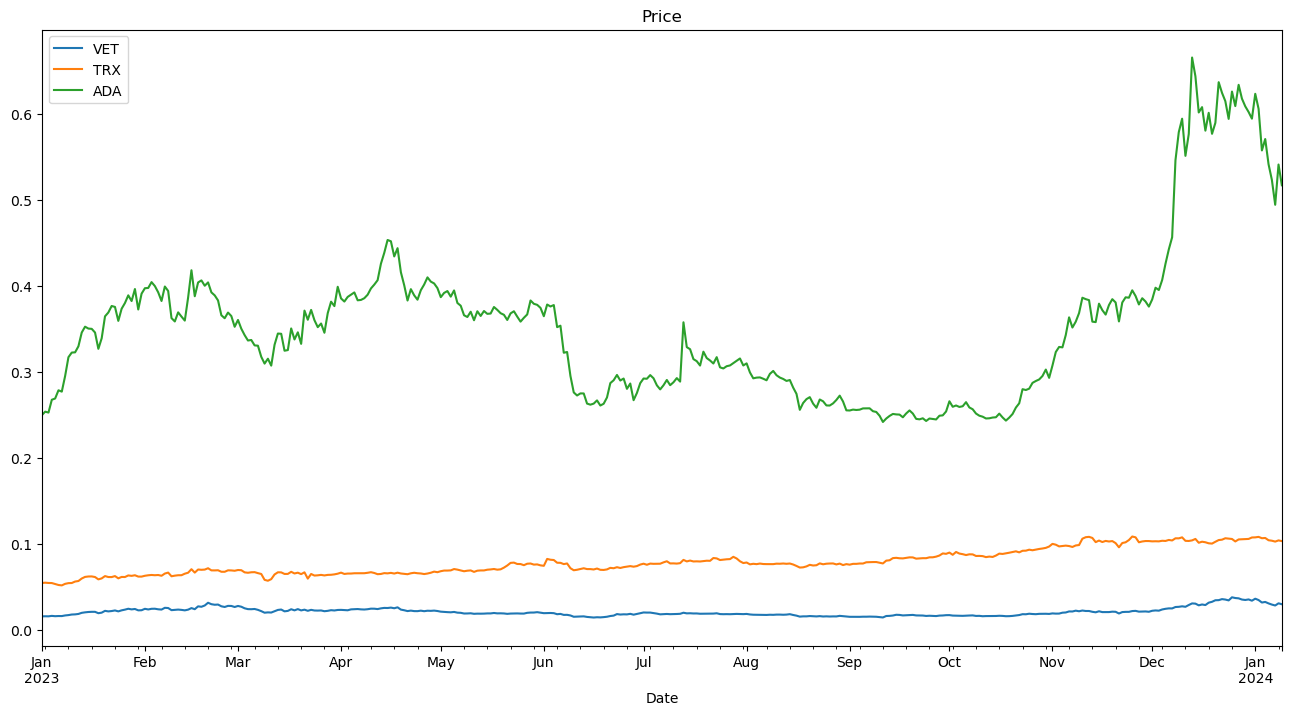

In [19]:
VET['Close'].plot(label='VET',figsize=(16,8),title='Price')
TRX['Close'].plot(label='TRX')
ADA['Close'].plot(label='ADA')
plt.legend()

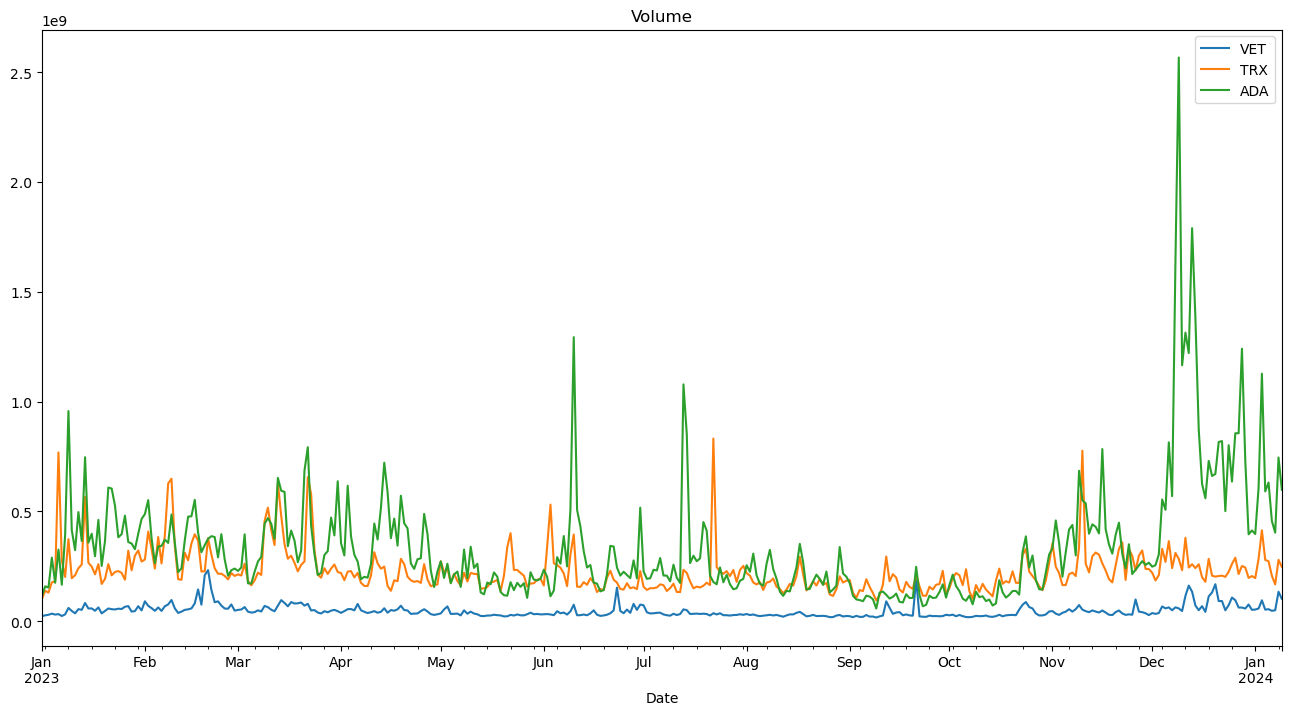

In [20]:
VET['Volume'].plot(label='VET',figsize=(16,8),title='Volume')
TRX['Volume'].plot(label='TRX')
ADA['Volume'].plot(label='ADA')
plt.legend()

In [21]:
TRX['Volume'].argmax()

202

In [22]:
TRX.index[202]

Timestamp('2023-07-22 00:00:00')

In [23]:
VET['Total Traded'] = VET['Open']*VET['Volume']
TRX['Total Traded'] = TRX['Open']*TRX['Volume']
ADA['Total Traded'] = ADA['Open']*ADA['Volume']


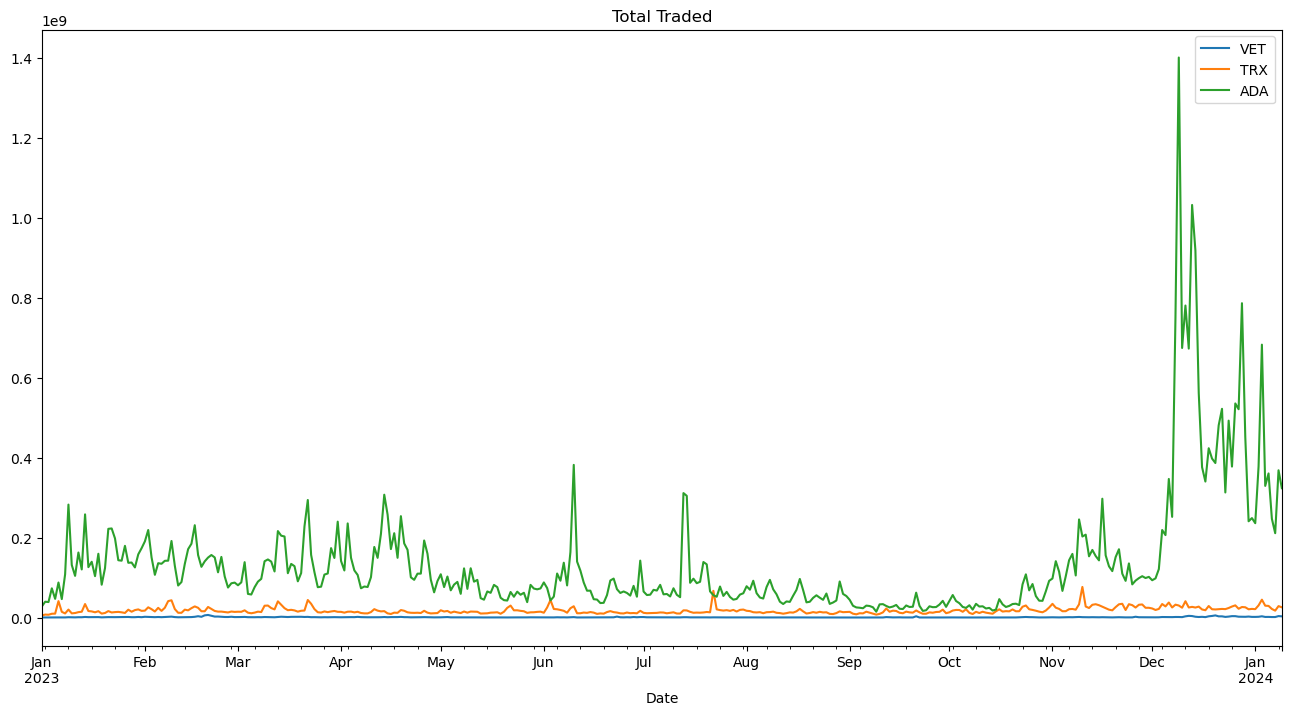

In [24]:
VET['Total Traded'].plot(label='VET',figsize=(16,8),title='Total Traded')
TRX['Total Traded'].plot(label='TRX')
ADA['Total Traded'].plot(label='ADA')
plt.legend()

In [25]:
ADA['Total Traded'].argmax()

342

In [26]:
ADA.index[342]

Timestamp('2023-12-09 00:00:00')

<Axes: xlabel='Date'>

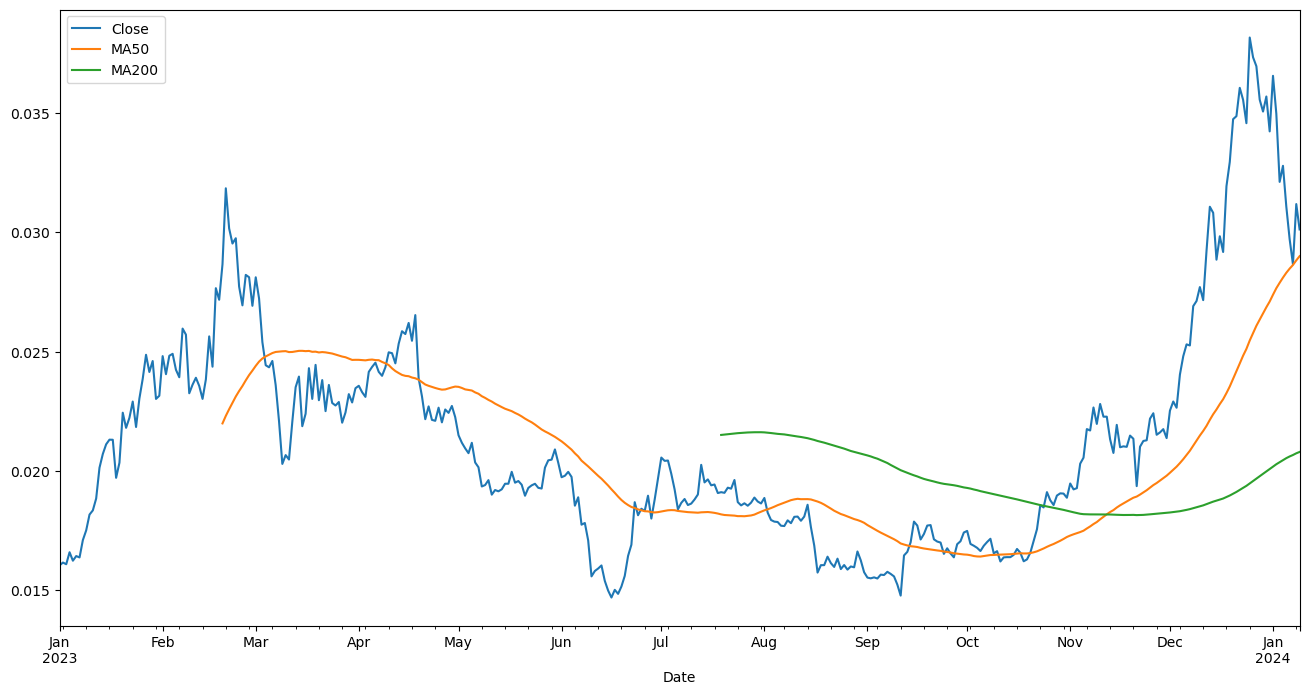

In [27]:
VET['MA50'] = VET['Close'].rolling(50).mean()
VET['MA200'] = VET['Close'].rolling(200).mean()
VET[['Close','MA50','MA200']].plot(label='VET',figsize=(16,8))

In [32]:
ADA = ADA[~ADA.index.duplicated()]
VET = VET[~VET.index.duplicated()]
TRX = TRX[~TRX.index.duplicated()]

In [33]:
ADA[ADA.index.duplicated()]

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Total Traded]
Index: []

In [42]:
asset = pd.concat([VET['Close'], ADA['Close']] , axis=1)
asset


Close     Close
Date                          
2023-01-01  0.016038  0.249771
2023-01-02  0.016157  0.253828
2023-01-03  0.016086  0.252796
2023-01-04  0.016589  0.267677
2023-01-05  0.016234  0.269102
...              ...       ...
2024-01-05  0.031091  0.541242
2024-01-06  0.029724  0.523103
2024-01-07  0.028666  0.494174
2024-01-08  0.031191  0.540936
2024-01-09  0.030126  0.516849

[374 rows x 2 columns]

In [43]:
asset.columns = ['VET Price','ADA Price']
asset

VET Price  ADA Price
Date                            
2023-01-01   0.016038   0.249771
2023-01-02   0.016157   0.253828
2023-01-03   0.016086   0.252796
2023-01-04   0.016589   0.267677
2023-01-05   0.016234   0.269102
...               ...        ...
2024-01-05   0.031091   0.541242
2024-01-06   0.029724   0.523103
2024-01-07   0.028666   0.494174
2024-01-08   0.031191   0.540936
2024-01-09   0.030126   0.516849

[374 rows x 2 columns]

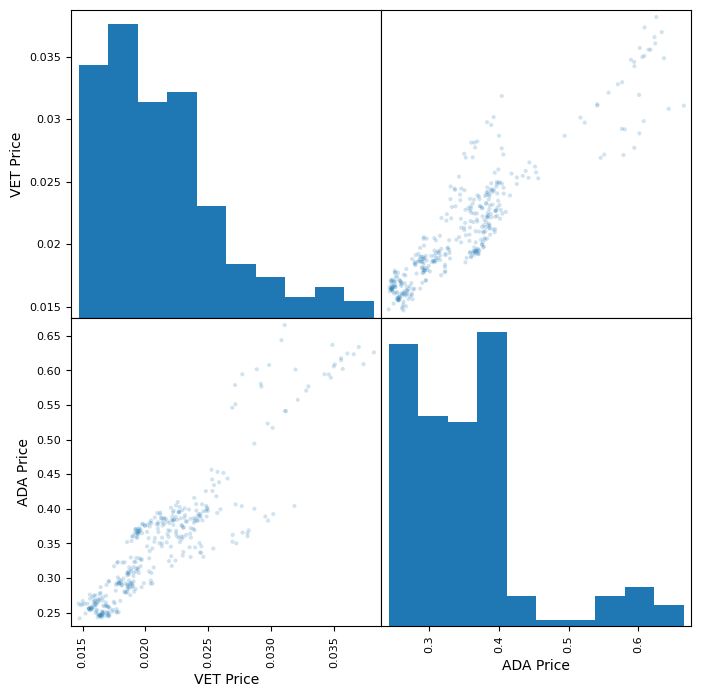

In [45]:
scatter_matrix(asset , figsize=(8,8) , alpha = 0.2);

In [46]:
ADA['Returns'] = (ADA['Close']/ADA['Close'].shift(1))-1
ADA.head()

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2023-01-01  0.246414  0.249771  0.244245  0.249771   0.249771  113369989   
2023-01-02  0.249778  0.255767  0.247368  0.253828   0.253828  159328803   
2023-01-03  0.253800  0.255062  0.250548  0.252796   0.252796  153555529   
2023-01-04  0.252796  0.269564  0.252244  0.267677   0.267677  289945179   
2023-01-05  0.267689  0.270251  0.264064  0.269102   0.269102  175511469   

            Total Traded   Returns  
Date                                
2023-01-01  2.793595e+07       NaN  
2023-01-02  3.979683e+07  0.016243  
2023-01-03  3.897239e+07 -0.004066  
2023-01-04  7.329698e+07  0.058866  
2023-01-05  4.698249e+07  0.005324

In [47]:
ADA['Returns'] = ADA['Close'].pct_change(1)
ADA.head()

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2023-01-01  0.246414  0.249771  0.244245  0.249771   0.249771  113369989   
2023-01-02  0.249778  0.255767  0.247368  0.253828   0.253828  159328803   
2023-01-03  0.253800  0.255062  0.250548  0.252796   0.252796  153555529   
2023-01-04  0.252796  0.269564  0.252244  0.267677   0.267677  289945179   
2023-01-05  0.267689  0.270251  0.264064  0.269102   0.269102  175511469   

            Total Traded   Returns  
Date                                
2023-01-01  2.793595e+07       NaN  
2023-01-02  3.979683e+07  0.016243  
2023-01-03  3.897239e+07 -0.004066  
2023-01-04  7.329698e+07  0.058866  
2023-01-05  4.698249e+07  0.005324

In [48]:
VET['Returns'] = VET['Close'].pct_change(1)
VET.head()

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2023-01-01  0.015789  0.016046  0.015696  0.016038   0.016038  23140403   
2023-01-02  0.016037  0.016312  0.015795  0.016157   0.016157  27336279   
2023-01-03  0.016158  0.016244  0.015837  0.016086   0.016086  29813130   
2023-01-04  0.016087  0.016610  0.016034  0.016589   0.016589  34939799   
2023-01-05  0.016588  0.016677  0.016164  0.016234   0.016234  30731317   

             Total Traded  MA50  MA200   Returns  
Date                                              
2023-01-01  365363.830313   NaN    NaN       NaN  
2023-01-02  438391.915705   NaN    NaN  0.007420  
2023-01-03  481720.543651   NaN    NaN -0.004394  
2023-01-04  562076.522997   NaN    NaN  0.031270  
2023-01-05  509771.104241   NaN    NaN -0.021400

<Axes: >

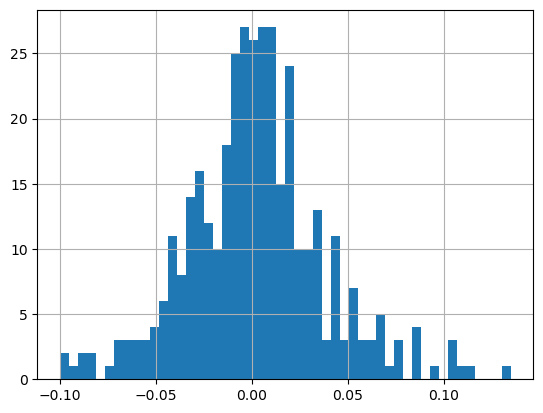

In [50]:
VET['Returns'].hist(bins=50)

<Axes: >

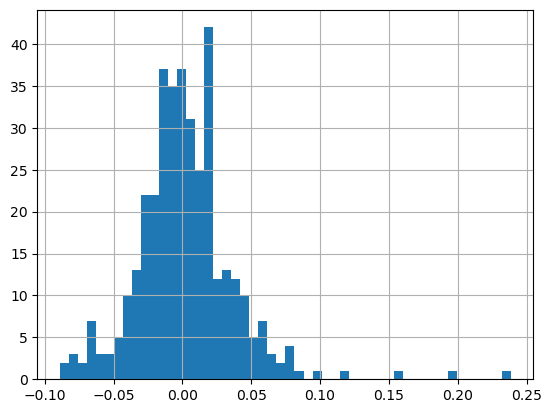

In [52]:
ADA['Returns'].hist(bins=50)

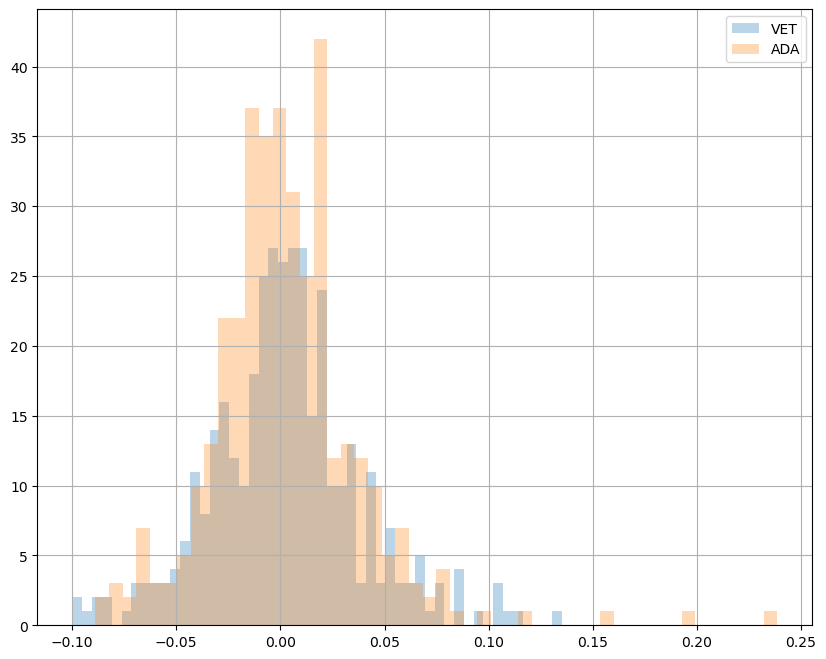

In [55]:
VET['Returns'].hist(bins=50, label='VET',figsize=(10,8),alpha=0.3)

ADA['Returns'].hist(bins=50,label='ADA',alpha=0.3)
plt.legend()

<Axes: >

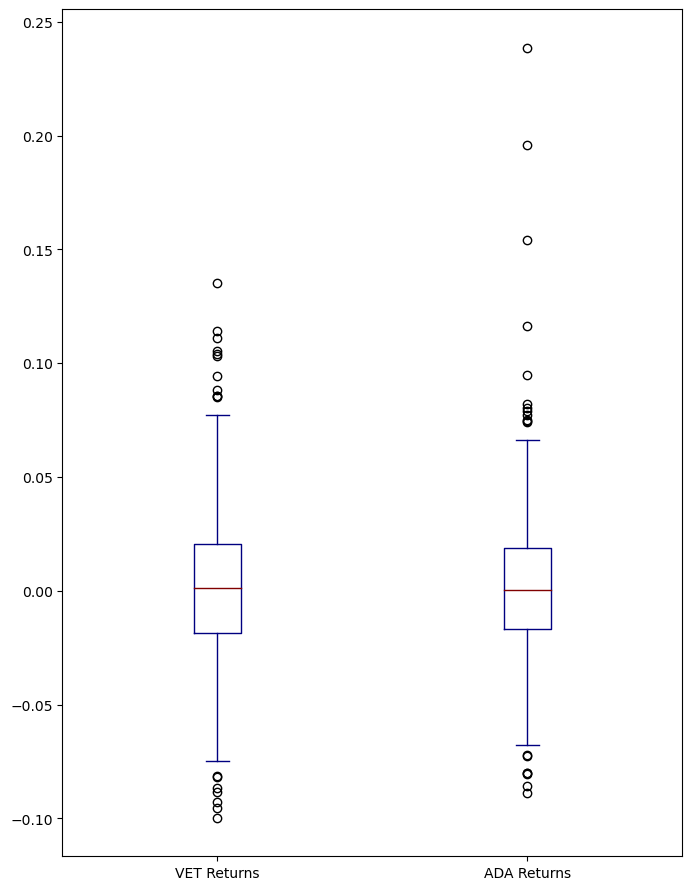

In [57]:
box_df = pd.concat([VET['Returns'],ADA['Returns']],axis=1)
box_df.columns = ['VET Returns','ADA Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')


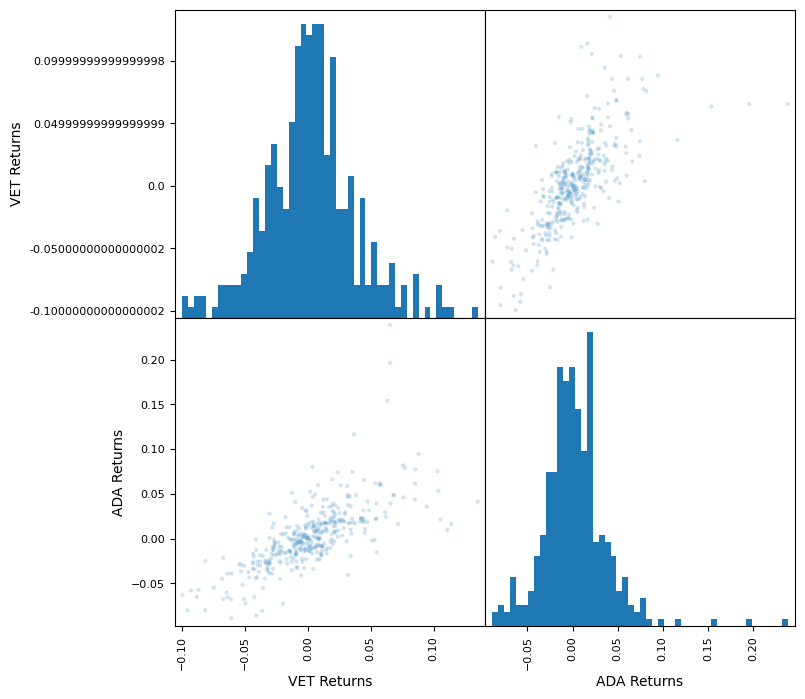

In [58]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});
